___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# NLP (Natural Language Processing) with Python

This is the notebook that goes along with the NLP video lecture.

In this lecture we will discuss a high-level overview of the basics of Natural Language Processing, which consists of combining machine-learning techniques with text entries, and using math and statistics to get that text in a format that the machine-learning algorithms can understand!

Once you've completed this lecture you'll have a project using Yelp Text Data.
    
**Requirements: You will need to have NLTK installed, along with downloading the corpus for stopwords. To download everything with a conda installation, run the cell below. Or reference the full video lecture**

In [1]:
# ONLY RUN THIS CELL IF YOU NEED 
# TO DOWNLOAD NLTK AND HAVE CONDA
# WATCH THE VIDEO FOR FULL INSTRUCTIONS ON THIS STEP

# Uncomment the code below and run:


# !conda install nltk # This installs NLTK

# import nltk # Imports NLTK library

# nltk.download() # Download the necessary datasets

## Get the Data

We'll be using a phone messages dataset from the [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection). 

This dataset is already located in the folder for this section.

The file we are using contains a collection of more than 5 thousand SMS phone messages. You can check out the **readme** file for more info.

Let's go ahead and use `rstrip()` plus a list comprehension to get a list of all the lines of text messages:

In [1]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

print(len(messages))

5574


In [2]:
messages

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham\tU dun say so early hor... U c already then say...',
 "ham\tNah I don't think he goes to usf, he lives around here though",
 "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv",
 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.',
 "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'spam\tWINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. 

A collection of texts is also sometimes called **corpus**. 

Let's print the first ten messages and number them using **`enumerate`** (which automatically numbers each entry):

In [3]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

Due to the spacing we can tell that this is a [TSV](http://en.wikipedia.org/wiki/Tab-separated_values) (tab-separated values) file, where the first column is a label saying whether the given message is a normal message commonly known as "ham", or whether it is "spam". The second column is the message itself (note our numbers aren't part of the file, they are just from the `enumerate` call).

Using the labeled 'ham' and 'spam' examples above, we can **train a machine-learning model to learn to discriminate between ham/spam automatically**. Then, with the 'trained' model, we can **classify arbitrary unlabeled messages** as ham or spam.

From the official SciKit-Learn documentation, we can visualize our process:

<img src='https://scipy-lectures.org/_images/sphx_glr_plot_ML_flow_chart_001.png' width=600/>

<img src='https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/_images/plot_ML_flow_chart_2.png' width=600/>

<img src='https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/_images/plot_ML_flow_chart_3.png' width=600/>

Instead of parsing the TSV file manually using Python, we can just take advantage of Pandas.

In [4]:
import pandas as pd

Use **`read_csv`**, and make note of the **`sep`** argument. We can also specify the desired column names by passing in a list of **`names`**.

In [5]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=["label", "message"])

messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

Let's check out some of the stats with some plots and the built-in methods in Pandas

In [6]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
# Frequency refers to the number of occurrences for the top values ('ham' and 'Sorry, I'll call later') in dataset

Use **`groupby`** to describe by label, and this way we can begin to think about the features that separate ham and spam

In [8]:
# In order to see how many times 'spam' occurs and the top-occurring spam message

messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

As we continue analysis, we want to start thinking about the features we are going to be using. This goes along with the general idea of [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering). The better your domain knowledge on the data, the better your ability to engineer more features from it. Feature engineering is a very large part of spam detection in general. I encourage you to read up on the topic.

Let's make a new column to detect how long the text messages are (number of characters):

In [9]:
messages['length'] = messages['message'].apply(len)

messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Data Visualization

Let's do the imports:

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

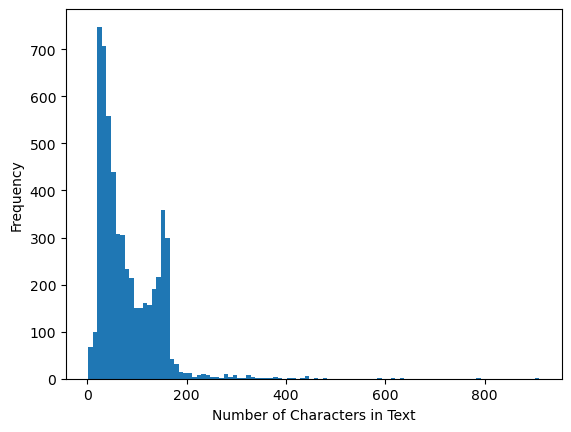

In [11]:
messages['length'].plot(bins=100, kind='hist')
plt.xlabel('Number of Characters in Text');

It looks like text length may be a good feature to think about. Most text messages have approx. 40-50 characters, but there is some incredible outlier of approx 1000 characters. There is bimodal distribution behaviour, with peaks around 40 and 150 characters.

Let's try to explain why the *x*-axis goes all the way to around 1000, since this must mean that there is some really long message!

In [12]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

Woah! A maximum of 910 characters.

Use **masking** to view the entire message:

In [13]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Looks like we have some sort of Romeo sending texts! But let's focus on the idea of trying to see if message length is a distinguishing feature between 'ham' and 'spam':

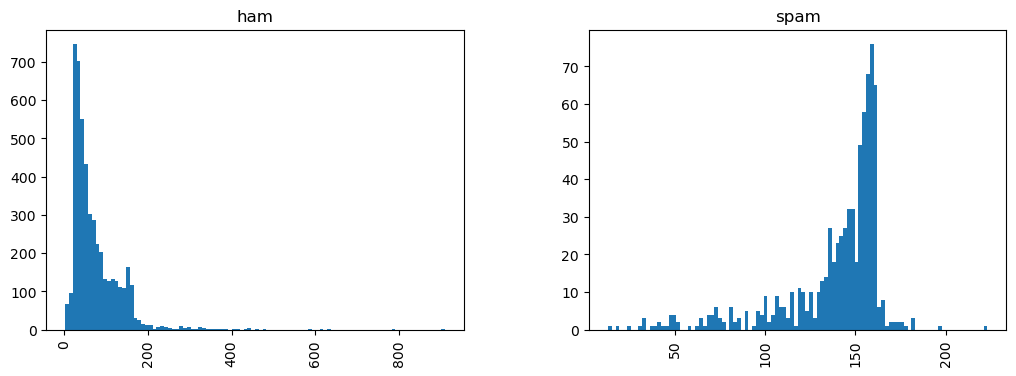

In [15]:
messages.hist(column='length', by='label', bins=100, figsize=(12, 4));

Through just basic EDA we've been able to discover a trend that 'spam' messages tend to have more characters (sorry Romeo!).

The 'ham' messages have an average between 0 and 200...centered around 50 characters.

The 'spam' messages have a more fixed range, centered around 150 characters.

It seems that text length is a good feature to distinguish between 'ham' and 'spam' messages.

Lets begin to pre-process the data so we can use it with SciKit Learn.

## Text Pre-processing

Our main issue with data is that it is all in text format (strings). The classification algorithms that we have learned about so far will need a **numerical feature vector** in order to perform any classification task. 

There are actually many methods to convert a *corpus* to a *vector* format. The simplest is the [bag-of-words](http://en.wikipedia.org/wiki/Bag-of-words_model) approach, where each unique word in a text is represented by a unique number.

In this section we will convert the raw messages (sequence of characters) into **vectors** (sequences of numbers).

We can write a function that will split a message into its **individual words** and return a list. From there, we can remove very common words from the output list, (e.g. 'the', 'a', etc..). To do this, we will take advantage of the *NLTK* library. It's pretty much the only library in Python for processing text and has a lot of useful features. We'll only use some of the basic ones here.

The function that will process the string in the message column can be called through `apply()` in Pandas, to process all the text entries in a column.

**Note! First step is to remove punctuation. Python's built-in `string` library allows us to get a quick list of all the possible punctuation:**

In [16]:
# How string library can be used:

import string

mess = 'Sample message! Notice: it has punctuation.'

# Check characters to see if they are in punctuation - outputs each character separately in list
nopunc = [char for char in mess if char not in string.punctuation]

# Join characters in list again to re-form the string without whitespace where punctuation was
nopunc = ''.join(nopunc)

In [17]:
nopunc

'Sample message Notice it has punctuation'

Now let's see how to remove stopwords. We can impot a list of english stopwords from NLTK (check the documentation for more languages and info).

In [18]:
from nltk.corpus import stopwords

stopwords.words('english')[0:10] # Show 1st ten stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Split each text into separate words in list format:

In [19]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [20]:
# How to remove any English stopwords

clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [21]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

Now let's put both of these together in a function to apply it to our DataFrame later on:

In [22]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

Here is the original DataFrame again:

In [23]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Let's **tokenize** these messages. 

Tokenization is the term used to describe the process of converting the normal text strings in to a list of 'tokens' (words that we actually want).

Let's see an example output on a column:

**Note: We may get some warnings or errors for symbols we didn't account for or that weren't in Unicode (like a British pound symbol)**

In [24]:
# Check to make sure function is working - clean version of the words in a list
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [25]:
# Show original dataframe
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
# To apply changes to entire column

#messages['message'].apply(text_process)

### Continuing Normalization

There are a lot of ways to continue 'normalizing' text, such as [stemming](https://en.wikipedia.org/wiki/Stemming), or distinguishing by [part of speech](http://www.nltk.org/book/ch05.html) (adjective, noun, verb etc.).

*NLTK* has many built-in methods, and great supporting documentation on these methods. Note that sometimes the methods don't work well for text messages due to the way people tend to use abbreviations or shorthand, For example:
    
    'Nah dawg, IDK! Wut time u headin to da club?'
    
versus

    'No dog, I don't know! What time are you heading to the club?'
    
Some text normalization methods will have trouble with this type of shorthand, so I'll leave you to explore more advanced methods through the [NLTK book online](http://www.nltk.org/book/).

For now we will just focus on using what we have to convert our list of words to an actual vector that SciKit-Learn can use.

## Vectorization

Currently, we have the messages as lists of 'tokens' (also known as [lemmas](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)), and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

We'll convert each message, represented as a list of tokens, into a vector that machine-learning models can understand.

We do that in three steps using a **bag-of-words** model:

1. Count how many times does a word occurs in each message (known as **Term Frequency**)

2. Weigh the counts, so that frequent tokens get a lower weight (known as **Inverse Document Frequency**)

3. Normalize the vectors to unit length, to abstract from the original text length (known as **L2 norm**)

Let's begin the first step:

Each vector will have as many dimensions as there are unique words in the corpus.  We will first use SciKit Learn's **`CountVectorizer`**. This model will convert a collection of text documents to a *sparse matrix* of token counts.

You can imagine this as a 2-D matrix (table), where one dimension is the entire vocabulary (1 row per word) and the other dimension is the actual documents, in this case a column per text message. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many text messages, we can expect a lot of zero counts for the presence of a word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

There are a lot of arguments and parameters that can be passed to the CountVectorizer. In this case we will just specify the **`analyzer`** to be our own previously defined function:

In [28]:
# 'Bag-Of-Words' Transformer, might take awhile...you are creating a very large matrix!

bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

You can use the `vocabulary_` attribute on the vectorizer to see the unique words and their index number:

In [29]:
# Total number of vocabulary words (11,425 words)
print(len(bow_transformer.vocabulary_))

11425


In [30]:
# Vocabulary is formatted as dictionary

type(bow_transformer.vocabulary_)

dict

In [31]:
list(bow_transformer.vocabulary_.items())[:10]

[('Go', 2060),
 ('jurong', 7555),
 ('point', 8917),
 ('crazy', 5769),
 ('Available', 1110),
 ('bugis', 5218),
 ('n', 8336),
 ('great', 6937),
 ('world', 11163),
 ('la', 7668)]

Let's take one text message and get its bag-of-words counts as a vector, putting to use our new bag-of-words transformer:

In [34]:
message_4 = messages['message'][3]

# Not great English...
print(message_4)

U dun say so early hor... U c already then say...


Now let's see its vector representation:

In [36]:
# Transform specific text message
bow4 = bow_transformer.transform([message_4])

# Unique words in text message listed by their index number and count
print(bow4)

# 1 row, 11,425 columns, i.e. the one document against all features in vectorizer
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


This means that there are seven unique words in message number 4 listed by their index number (remember this is after removing common stop words). 

Two of the words appear twice, the rest appear only once. 

Let's check and confirm which ones appear twice using `get_feature_names_out` method:

In [38]:
# Print feature 4073
print(bow_transformer.get_feature_names_out()[4068])

# Print feature 9570
print(bow_transformer.get_feature_names_out()[9554])

U
say


Now we can use **`.transform`** on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of text messages. 

Let's see how the 'bag-of-words' word counts for the entire corpus is a large, sparse matrix:

In [39]:
messages_bow = bow_transformer.transform(messages['message'])

In [40]:
# Rows-by-columns (i.e. 5572 rows, 11425 columns)
print('Shape of Sparse Matrix: ', messages_bow.shape)

# Number of non-zero values in matrix
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [44]:
# Sparsity is measured as percentage of matrix that is empty, i.e. approx. 8%
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))

print('sparsity: {}'.format(round(sparsity, 3)))

sparsity: 0.079


After counting the number of occurrences, the token 'weighting' and 'normalization' can be done with [TF-IDF](http://en.wikipedia.org/wiki/Tf%E2%80%93idf), using scikit-learn's `TfidfTransformer`.

____
### So what is TF-IDF?
TF-IDF stands for *Term Frequency-Inverse Document Frequency*, and the TF-IDF 'weight' is a penalty often used in information retrieval and text mining. 

This 'weight' is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document, but it is offset by the frequency of the word in the entire corpus. Variations of TF-IDF weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest *ranking functions* is computed by summing the TF-IDF for each query term - many more sophisticated ranking functions are variants of this simple model.

Typically, the TF-IDF weight is composed by two terms: 
* the first term computes the *normalized Term Frequency* (TF), aka the number of times a word appears in a document, divided by the total number of words in that document; 
* the second term is the *Inverse Document Frequency* (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

**TF: Term Frequency** measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear many more times in longer documents than shorter ones. Thus, TF is often divided by the document length (aka the total number of terms in the document), as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*


**IDF: Inverse Document Frequency** measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to 'weigh' down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

See below for a simple example.

**Example:**

Consider a document containing 100 words where the word 'cat' appears 3 times. 

The *Term Frequency* (TF) for 'cat' is (3 / 100) = 0.03. 

Assume we have 10 million documents in total, and the word 'cat' appears in one thousand of these. 

The *Inverse Document Frequency* (IDF) is calculated as log(10,000,000 / 1,000) = 4. 

Thus, the TF-IDF weight for the word 'cat' is the product of these quantities: 0.03 * 4 = **0.12**.
____

Let's see how we can do this in SciKit Learn:

In [45]:
from sklearn.feature_extraction.text import TfidfTransformer

In [46]:
# 'Fitting' TF-IDF transformer to count-vectorized matrix will add 'weights' to the terms

tfidf_transformer = TfidfTransformer().fit(messages_bow)

tfidf4 = tfidf_transformer.transform(bow4)

print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [ ]:
# Text message 4 has 7 unique words (as indexed) with TF-IDF values attached

We'll go ahead and check the IDF (Inverse Document Frequency) of the words `"u"` and `"university"`:

In [50]:
print('TF-IDF value for "u":', round(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']], 2))

print('TF-IDF value for "university":', round(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']], 2))

TF-IDF value for "u": 3.28
TF-IDF value for "university": 8.53


To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [48]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

# 5572 rows, 11425 columns
print(messages_tfidf.shape)

(5572, 11425)


There are many ways the data can be pre-processed and vectorized. These steps usually involve feature engineering and building a "pipeline". I encourage you to check out SciKit Learn's documentation on dealing with text data, as well as the expansive collection of available papers and books on the general topic of NLP.

## Training a model

With text messages represented as vectors, we can finally train our spam/ham classifier. We can actually use almost any sort of classification algorithms. 

For a [variety of reasons](http://www.inf.ed.ac.uk/teaching/courses/inf2b/learnnotes/inf2b-learn-note07-2up.pdf), the **Naive Bayes** classifier algorithm is a good choice.

We'll be using Scikit-Learn to import the [Naive Bayes](http://en.wikipedia.org/wiki/Naive_Bayes_classifier) classifier:

In [51]:
from sklearn.naive_bayes import MultinomialNB

spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

Let's try classifying our single random message and checking how we do:

In [52]:
print('predicted label for text message 4:', spam_detect_model.predict(tfidf4)[0])

print('actual label for text message 4:', messages.label[3])

predicted label for text message 4: ham
actual label for text message 4: ham


Fantastic! We've developed a model that can attempt to predict spam vs ham classification.

## Part 6: Model Evaluation

Now we want to determine how well our model will do overall on the entire dataset. Let's begin by generating all the predictions:

In [53]:
all_predictions = spam_detect_model.predict(messages_tfidf)

print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


We can use SciKit Learn's built-in classification report, which returns [precision, recall,](https://en.wikipedia.org/wiki/Precision_and_recall) [f1-score](https://en.wikipedia.org/wiki/F1_score), and a column for support (meaning how many cases supported that classification). Check out the links for more detailed info on each of these metrics and the figure below:

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png' width=400 />

In [54]:
from sklearn.metrics import classification_report

print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



There are quite a few possible metrics for evaluating model performance. Which one is the most important depends on the task and the business effects of decisions based off of the model. For example, the cost of mis-predicting "spam" as "ham" is probably much lower than mis-predicting "ham" as "spam".

In the above assessment, we evaluated accuracy on the same data we used for training. **You should never evaluate on the same dataset you train on!**

Such evaluation tells us nothing about the true predictive power of our model. If we simply remembered each example during training, the accuracy on training data would be 100%, even though we cannot classify any new text messages.

A proper way is to split the data into a training and test sets, where the model only ever sees the **training set** during its model fitting and parameter tuning. The **test set** is only used to generate predictions in classifier. Only then will our final evaluation on the test data be representative of the true predictive performance.


## Train Test Split

In [58]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.2)

print("Length of training set is", len(msg_train))
print("Length of test set is", len(msg_test))
print("Length of training AND test set is", len(msg_train) + len(msg_test))

Length of training set is 4457
Length of test set is 1115
Length of training AND test set is 5572


The test size is 20% of the entire dataset (i.e. 1115 messages out of total 5572).

The training set is the rest (i.e. 4457 out of 5572). 

Note that the default train/test split in SciKit-Learn function is 30/70.

## Creating a Data Pipeline

Let's run our model again and then predict off the test set. 

We will use SciKit Learn's [`Pipeline`](http://scikit-learn.org/stable/modules/pipeline.html) capabilities to store a pipeline of workflow. This will allow us to define all the transformation steps that we will apply to the data for future use. 

Let's see an example of how `Pipeline` works:

In [59]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings-to-token integer count
    ('tfidf', TfidfTransformer()),  # Integer counts transformed to 'weighted' TF-IDF scores
    ('classifier', MultinomialNB()),  # Train Naive Bayes classifier on TF-IDF vectors
])

Now we can directly pass text message data to the pipeline, which will do our pre-processing for us! We can treat it as a model or *estimator API*:

In [60]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001ECCC8AADC8>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [61]:
predictions = pipeline.predict(msg_test)

In [62]:
print(classification_report(predictions, label_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98      1026
        spam       0.65      1.00      0.79        89

    accuracy                           0.96      1115
   macro avg       0.83      0.98      0.88      1115
weighted avg       0.97      0.96      0.96      1115



Now we have a classification report for our model based on a true testing set. With an average accuracy of 96%, this seems to be a suitable approach to classifying spam vs ham text messages.

There is a lot more to NLP than what is covered here, and its vast expanse could fill up several college courses! I encourage you to check out the resources below for more information on NLP.

## More Resources

Check out the links below for more info on Natural Language Processing:

[NLTK Book Online](http://www.nltk.org/book/)

[Kaggle Walkthrough](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words)

[SciKit Learn's Tutorial](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)

# Good Job!